<a href="https://colab.research.google.com/github/hyo1happy/work/blob/master/HyowonKim_2019020723_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: right"> __ Provided on May 27 and due on June 17__ [BRI516, Spring/2019] </div>

For homework in general:
* Install `Anaconda` and create an environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn` in Python 3.5 
* Please upload your jupyter-notebook file for homework to `Blackboard`
* Please visualize the results as much as possible and discuss your results at least one line of text

In [0]:
## Disable warning message
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [0]:
## import library & module
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import os
import sys
import struct
import numpy as np

#### [Hw05] Implementing a Multilayer Neural Networks using TensorFlow (TF) 1.x (Ch. 13)


##### (1) Data preparation
    (1a) Load the train dataset and test dataset of the MNIST 
    

  

In [3]:
## import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data/mnist/", validation_size=5000)

W0617 13:33:48.110947 140108863686528 deprecation.py:323] From <ipython-input-3-f6494e31dbf4>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0617 13:33:48.112670 140108863686528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0617 13:33:48.113529 140108863686528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ./data/mnist/train-images-idx3-ubyte.gz


W0617 13:33:48.364398 140108863686528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0617 13:33:48.409774 140108863686528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


    (1b) Set the first 55,000 samples in the training dataset as training data, the remaining 5,000 samples in the training dataset as validation data, and 10,000 samples in the test dataset as test data.

In [4]:
## Set the first 55,000 samples in the training dataset as training data
X_train = mnist_data.train.images
y_train = mnist_data.train.labels
print('training data\n rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

# the remaining 5,000 samples in the training dataset as validation data
X_valid = mnist_data.validation.images
y_valid = mnist_data.validation.labels
print('validation data\n rows: %d, columns: %d' % (X_valid.shape[0], X_valid.shape[1]))

# 10,000 samples in the test dataset as test data
X_test = mnist_data.test.images
y_test = mnist_data.test.labels
print('test data\n rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

training data
 rows: 55000, columns: 784
validation data
 rows: 5000, columns: 784
test data
 rows: 10000, columns: 784


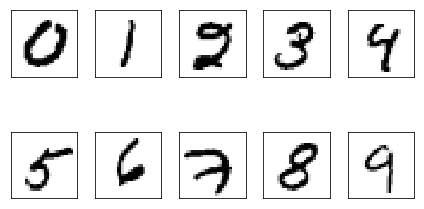

In [5]:
# check
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
## mean centering and normalization:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

del X_train, X_test, X_valid

print(X_train_centered.shape, y_train.shape)
print(X_valid_centered.shape, y_valid.shape)
print(X_test_centered.shape, y_test.shape)

(55000, 784) (55000,)
(5000, 784) (5000,)
(10000, 784) (10000,)


##### (2) Multilayer perceptron (MLP) using the low-level API of TF (e.g., p. 429)
    (2a) Implement the multilayer perceptron (MLP) with two hidden layers for classification, and evaluate performance in the following scenarios

        (2a-1) for a few choices of hidden nodes per hidden layer

In [0]:
def create_batch_generator(X, y, batch_size=1, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    
    if shuffle:
        data = np.column_stack((X_copy, y_copy))
        np.random.shuffle(data)
        X_copy = data[:, :-1]
        y_copy = data[:, -1].astype(int)
        
    for i in range(0, X.shape[0], batch_size):
        yield (X[i:i+batch_size, :], y[i:i+batch_size])

In [0]:
## 미리 코드상에는 2a), 2b) 2c) 구현 다 해놓은 후 각각을 값을 줘서 실행할 수 있는 코드로 설정
class MLP(object):    
    def __init__(self, n_features, epochs=10, learning_rate=0.001, l2= 0, n_hidden=32, batch_size=1, shuffle=False, random_seed=None, activation_fn='sigmoid'):
        np.random.seed(random_seed)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.shuffle = shuffle
        self.n_hidden = n_hidden
        self.n_features = n_features
        self.valid_acc_ = 0.0
        self.train_loss_ = 0.0
        self.output_ = 0.0
        self.l2 = l2
        self.batch_size = batch_size
        if activation_fn == 'sigmod':
            self.activation = tf.nn.sigmoid
        elif activation_fn == 'tanh':
            self.activation = tf.nn.tanh
        elif activation_fn == 'relu':
            self.activation = tf.nn.relu
        else: # default
            self.activation = tf.nn.sigmoid
            
        self.test=0.
                
        g = tf.Graph()
        with g.as_default():
            ## set random-seed:
            tf.set_random_seed(random_seed)
            
            ## build the network:
            self.build()
            
            ## initializer
            self.init_op = tf.global_variables_initializer()
            
        ## create a session
        self.sess = tf.Session(graph=g)
    
    def build(self):
        n_classes = 10
        
        ## Placeholders for X and y:
        tf_x = tf.placeholder(dtype=tf.float32, shape=(None, n_features), name='tf_x')
        tf_y = tf.placeholder(dtype=tf.int32, shape=None, name='tf_y')
        
        ## One-hot encoding:
        y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
        
        ## Store layers weight & bias
        weights = {
        'h1': tf.Variable(tf.random_normal([self.n_features, self.n_hidden])),
        'h2': tf.Variable(tf.random_normal([self.n_hidden, self.n_hidden])),
        'out': tf.Variable(tf.random_normal([self.n_hidden, n_classes]))
        }
        biases = {
            'b1': tf.Variable(tf.random_normal([self.n_hidden])),
            'b2': tf.Variable(tf.random_normal([self.n_hidden])),
            'out': tf.Variable(tf.random_normal([n_classes]))
        }
            
        ## 1st layer(Hidden#1)
        layer_1 = self.activation(tf.add(tf.matmul(tf_x, weights['h1']), biases['b1']))
        
        ## 2nd layer(Hidden#2)
        layer_2 = self.activation(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
        
        ## output
        logits = tf.matmul(layer_2, weights['out']) + biases['out']
        self.output_ = logits
        
        ## Prediction
        predictions = {
            #'classes' : tf.argmax(logits, axis=1, name='predicted_classes'),
            'probabilities' : tf.nn.softmax(logits, name='softmax_tensor'),
            'labels' : tf.cast(tf.argmax(logits, axis=1), tf.int32, name='labels')
        }
        
        ## Loss Function and Optimization
        regularizer = (self.l2 / 2) * (tf.reduce_mean(tf.square(weights['h1'])) + tf.reduce_mean(tf.square(weights['h2'])))
        cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_onehot),name='cross_entropy_loss')
        cross_entropy_loss_l2 = tf.add(cross_entropy_loss, regularizer, name='cross_entropy_loss_l2')
        
        ## Optimizer:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate)
        optimizer = optimizer.minimize(cross_entropy_loss_l2, name='train_op')
        
        ## Finding accuracy
        correct_predictions = tf.equal(predictions['labels'], tf_y, name='correct_preds')
        
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32), name='accuracy')
        
    def train(self, training_set, validation_set=None, initialize=True):
        ## initialize variables
        if initialize:
            self.sess.run(self.init_op)
        
        self.train_cost_ = []
        X_data = np.array(training_set[0])
        y_data = np.array(training_set[1])
        
        if self.batch_size > 1:
            self.shuffle = True
                
        for epoch in range(1, self.epochs + 1):
            batch_gen = create_batch_generator(X_train_centered, y_train, batch_size=self.batch_size, shuffle=self.shuffle)
            
            avg_loss = 0.0
            for i, (batch_x,batch_y) in enumerate(batch_gen):
                feed = {'tf_x:0': batch_x, 'tf_y:0': batch_y}
                loss, _ = self.sess.run(['cross_entropy_loss_l2:0', 'train_op'], feed_dict=feed)
                avg_loss += loss
                
            self.train_loss_ = avg_loss
            print('Epoch %02d: Training Avg. Loss: ' '%7.3f' % (epoch, avg_loss), end=' ')
            
            if validation_set is not None:
                feed = {'tf_x:0': validation_set[0], 'tf_y:0': validation_set[1]}
                valid_acc = self.sess.run('accuracy:0', feed_dict=feed)
                self.valid_acc_ = valid_acc
                print('Validation Acc: %7.3f' % self.valid_acc_)
            else:
                self.valid_acc_ = 0.0
                print()
                
    def predict(self, X_test, return_proba = False):
        feed = {'tf_x:0': X_test}
        if return_proba:
            return self.sess.run('probabilities:0', feed_dict=feed)
        else:
            return self.sess.run('labels:0', feed_dict=feed)

In [0]:
## global varaibles : n_features
n_features = X_train_centered.shape[1]
n_epochs = 3

In [10]:
## a few choices of hidden nodes per hidden layer
hidden_nodes = [64, 256, 512, 1024]
val_accs_0 = []
cost_accs_0 = []
pred_accs_0 = []
for n_hidden in hidden_nodes:
    mlp = MLP(n_hidden=n_hidden, n_features=n_features, random_seed=123, epochs=n_epochs)
    
    print('======== hidden size : %d ========' % n_hidden)
    mlp.train(training_set=(X_train_centered, y_train), validation_set=(X_valid_centered, y_valid))
    
    val_accs_0.append(mlp.valid_acc_)
    cost_accs_0.append(mlp.train_loss_)
    pred_accs_0.append(mlp.predict(X_test_centered))
    
min_index = cost_accs_0.index(min(cost_accs_0))
best_hidden = hidden_nodes[min_index]
preds0 = pred_accs_0[min_index]
print('\n** best hidden node : %d' % best_hidden)

W0617 13:33:49.784905 140108863686528 deprecation.py:323] From <ipython-input-8-00666efd3b4a>:80: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



======== hidden size : 64 ========
Epoch 01: Training Avg. Loss: 93909.072 Validation Acc:   0.665
Epoch 02: Training Avg. Loss: 48518.228 Validation Acc:   0.751
Epoch 03: Training Avg. Loss: 39219.905 Validation Acc:   0.790
======== hidden size : 256 ========
Epoch 01: Training Avg. Loss: 137716.972 Validation Acc:   0.728
Epoch 02: Training Avg. Loss: 53930.703 Validation Acc:   0.787
Epoch 03: Training Avg. Loss: 39378.406 Validation Acc:   0.808
======== hidden size : 512 ========
Epoch 01: Training Avg. Loss: 162072.006 Validation Acc:   0.784
Epoch 02: Training Avg. Loss: 60281.039 Validation Acc:   0.816
Epoch 03: Training Avg. Loss: 38879.646 Validation Acc:   0.832
======== hidden size : 1024 ========
Epoch 01: Training Avg. Loss: 205268.560 Validation Acc:   0.808
Epoch 02: Training Avg. Loss: 66040.946 Validation Acc:   0.830
Epoch 03: Training Avg. Loss: 32322.837 Validation Acc:   0.836

** best hidden node : 1024


        (2a-2) for a few choices of activation functions (i.e., sigmoid, tanh, and ReLU)

In [13]:
## a few choices of activation functions
activations = ['sigmoid', 'tanh', 'relu']
val_accs_1 = []
cost_accs_1 = []
pred_accs_1 = []
for activation_fn in activations:
    mlp_act = MLP(n_hidden=best_hidden, activation_fn=activation_fn, random_seed=123, epochs=5, n_features=n_features)
    
    print('======== activation function : %s ========' % activation_fn)
    mlp_act.train(training_set=(X_train_centered, y_train), validation_set=(X_valid_centered, y_valid))
    
    val_accs_1.append(mlp_act.valid_acc_)
    cost_accs_1.append(mlp_act.train_loss_)
    pred_accs_1.append(mlp_act.predict(X_test_centered))
    
min_index = cost_accs_1.index(min(cost_accs_1))
best_activation = activations[min_index]
preds1 = pred_accs_1[min_index]
print('\n** best activation function : %s' % best_activation)

======== activation function : sigmoid ========
Epoch 01: Training Avg. Loss: 205268.560 Validation Acc:   0.808
Epoch 02: Training Avg. Loss: 66040.946 Validation Acc:   0.830
Epoch 03: Training Avg. Loss: 32322.837 Validation Acc:   0.836
Epoch 04: Training Avg. Loss: 17401.804 Validation Acc:   0.837
Epoch 05: Training Avg. Loss: 9893.384 Validation Acc:   0.835
======== activation function : tanh ========
Epoch 01: Training Avg. Loss: 425954.625 Validation Acc:   0.835
Epoch 02: Training Avg. Loss: 215761.171 Validation Acc:   0.855
Epoch 03: Training Avg. Loss: 165238.476 Validation Acc:   0.869
Epoch 04: Training Avg. Loss: 136068.944 Validation Acc:   0.880
Epoch 05: Training Avg. Loss: 114085.353 Validation Acc:   0.892
======== activation function : relu ========
Epoch 01: Training Avg. Loss: 16243759.543 Validation Acc:   0.492
Epoch 02: Training Avg. Loss: 130784.806 Validation Acc:   0.510
Epoch 03: Training Avg. Loss: 89439.881 Validation Acc:   0.488
Epoch 04: Training Av

      (2b) Add the L2-norm regularization of weights to (2a) and evalute performance for a few choices of L2-norm regularization parameters. For this, please pick the best-performing model from (2a)

In [18]:
## a few choices of L2-norm regularization parameters
l2_weight_decays = [1e-4, 1e-2, 1e-1]
val_accs_2 = []
cost_accs_2 = []
pred_accs_2 = []
for l2_weight_decay in l2_weight_decays:
    mlp_l2 = MLP(n_hidden=best_hidden, activation_fn=best_activation, l2=l2_weight_decay, epochs=n_epochs, n_features=n_features, random_seed=123)
    
    print('======== L2-norm regularization of weights : %f ========' % l2_weight_decay)
    mlp_l2.train(training_set=(X_train_centered, y_train), validation_set=(X_valid_centered, y_valid))
    
    val_accs_2.append(mlp_l2.valid_acc_)
    cost_accs_2.append(mlp_l2.train_loss_)
    pred_accs_2.append(mlp_l2.predict(X_test_centered))
    
min_index = cost_accs_2.index(min(cost_accs_2))
best_weight = l2_weight_decays[min_index]
preds2 = pred_accs_2[min_index]
print('\n** best L2-norm regularization of weights: %f' % best_weight)

======== L2-norm regularization of weights : 0.000100 ========
Epoch 01: Training Avg. Loss: 205274.064 Validation Acc:   0.808
Epoch 02: Training Avg. Loss: 66046.425 Validation Acc:   0.830
Epoch 03: Training Avg. Loss: 32328.279 Validation Acc:   0.836
======== L2-norm regularization of weights : 0.010000 ========
Epoch 01: Training Avg. Loss: 205817.268 Validation Acc:   0.808
Epoch 02: Training Avg. Loss: 66589.683 Validation Acc:   0.830
Epoch 03: Training Avg. Loss: 32871.547 Validation Acc:   0.836
======== L2-norm regularization of weights : 0.100000 ========
Epoch 01: Training Avg. Loss: 210755.711 Validation Acc:   0.808
Epoch 02: Training Avg. Loss: 71528.443 Validation Acc:   0.830
Epoch 03: Training Avg. Loss: 37810.491 Validation Acc:   0.836

** best L2-norm regularization of weights: 0.000100


    (2c) Evaluate the performance of (2b) for a few options of mini-batch sizes 

In [23]:
## a few options of mini-batch sizes
batch_sizes = [128, 64, 16]
val_accs_3 = []
cost_accs_3 = []
pred_accs_3 = []
for n_batch_size in batch_sizes:
    mlp_batch = MLP(n_hidden=best_hidden, activation_fn=best_activation, l2=best_weight, batch_size=n_batch_size, epochs=n_epochs, n_features=n_features, random_seed=123)
    
    print('======== mini-batch sizes : %d ========' % n_batch_size)
    mlp_batch.train(training_set=(X_train_centered, y_train), validation_set=(X_valid_centered, y_valid))
    
    val_accs_3.append(mlp_batch.valid_acc_)
    cost_accs_3.append(mlp_batch.train_loss_)
    pred_accs_3.append(mlp_batch.predict(X_test_centered))
    
min_index = cost_accs_3.index(min(cost_accs_3))
best_batch = batch_sizes[min_index]
preds3 = pred_accs_3[min_index]
print('\n** best mini-batch sizes: %d' % best_batch)

======== mini-batch sizes : 128 ========
Epoch 01: Training Avg. Loss: 8275.204 Validation Acc:   0.145
Epoch 02: Training Avg. Loss: 6244.306 Validation Acc:   0.192
Epoch 03: Training Avg. Loss: 5356.656 Validation Acc:   0.236
======== mini-batch sizes : 64 ========
Epoch 01: Training Avg. Loss: 14551.935 Validation Acc:   0.192
Epoch 02: Training Avg. Loss: 10106.334 Validation Acc:   0.283
Epoch 03: Training Avg. Loss: 8115.356 Validation Acc:   0.354
======== mini-batch sizes : 16 ========
Epoch 01: Training Avg. Loss: 40092.441 Validation Acc:   0.419
Epoch 02: Training Avg. Loss: 20870.498 Validation Acc:   0.552
Epoch 03: Training Avg. Loss: 15320.849 Validation Acc:   0.615

** best mini-batch sizes: 128


    (2d) Commonly for the results for (2a) - (2c), discuss the results such as by presenting convergence curves of cost and/or accuracy and by exemplifying the misclassified digits

In [0]:
def plot_misclassified(X, y, misclassified, predicted):
    fig = plt.figure('misclassified digits', figsize=(10, 10))    
    for i in range(10):
        subplot = fig.add_subplot(2, 5, i+1)            
        subplot.set_xticks([])
        subplot.set_yticks([])            
        subplot.set_title('ground truth : %d\npredicted : %d' % (y[misclassified[i]], predicted[misclassified[i]]))            
        subplot.imshow(X[misclassified[i], :].reshape((28, 28)), cmap=plt.cm.gray_r)

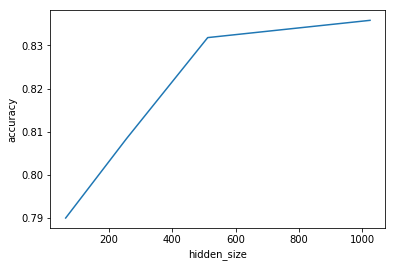

Test Accuracy(hidden nodes): 83.57%


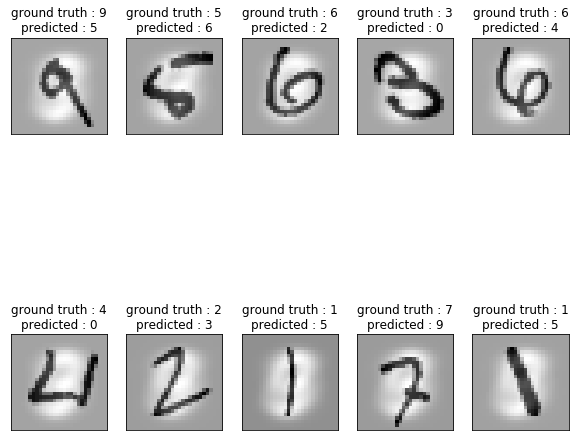

In [20]:
## a few choices of hidden nodes per hidden layer
plt.plot(hidden_nodes, val_accs_0, label='acc per hidden nodes')
plt.xlabel('hidden_size')
plt.ylabel('accuracy')
plt.show()

print('Test Accuracy(hidden nodes): %.2f%%' % (100*np.sum(y_test == preds0)/len(y_test)))

misclassified = np.where(preds0 != y_test)[0]
plot_misclassified(X_test_centered, y_test, misclassified, preds0)

* hidden layer에서 hidden node의 수를 증가시킬수록 accuracy가 올라감을 확인할 수 있었다.

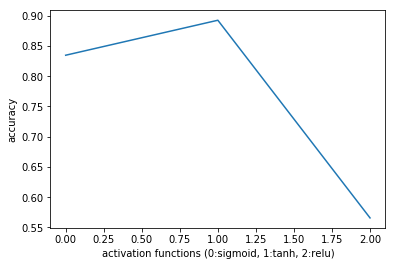

Test Accuracy(hidden nodes+activation): 83.69%


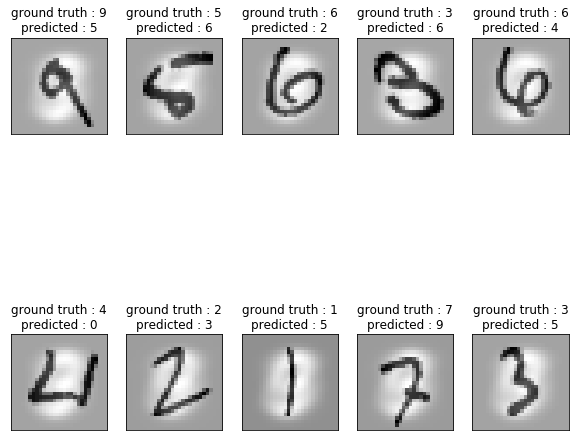

In [21]:
## a few choices of activation functions
plt.plot([0, 1, 2], val_accs_1, label='acc per activation functions')
plt.xlabel('activation functions (0:sigmoid, 1:tanh, 2:relu)')
plt.ylabel('accuracy')
plt.show()

print('Test Accuracy(hidden nodes+activation): %.2f%%' % (100*np.sum(y_test == preds1)/len(y_test)))

misclassified = np.where(preds1 != y_test)[0]
plot_misclassified(X_test_centered, y_test, misclassified, preds1)

* validation accuracy는 tanh가 가장 좋은데 cost가 sigmoid가 tanh, relu보다 activation function으로 더 좋은 성능을 보임을 알 수 있었다.

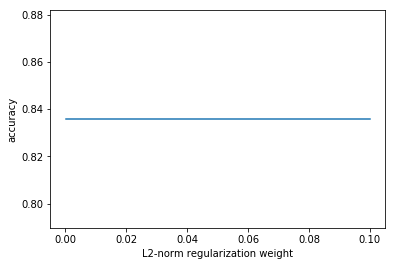

Test Accuracy(hidden nodes+activation+L2-norm): 83.57%


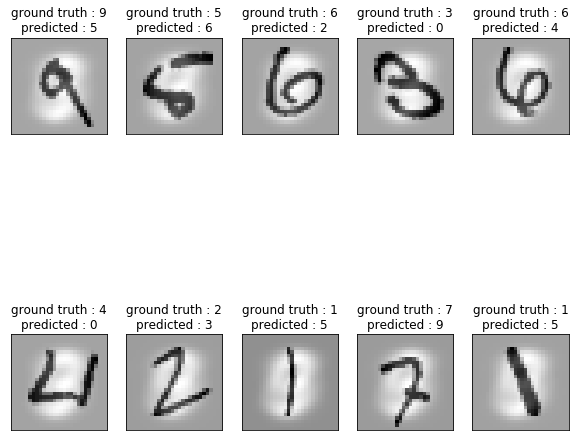

In [22]:
## a few choices of L2-norm regularization parameters
plt.plot(l2_weight_decays, val_accs_2, label='acc per L2-norm regularization weight')
plt.xlabel('L2-norm regularization weight')
plt.ylabel('accuracy')
plt.show()

print('Test Accuracy(hidden nodes+activation+L2-norm): %.2f%%' % (100*np.sum(y_test == preds2)/len(y_test)))

misclassified = np.where(preds2 != y_test)[0]
plot_misclassified(X_test_centered, y_test, misclassified, preds2)

* L2-Norm에서 weight decay에 따라 별 영향이 없을을 확인하였다.

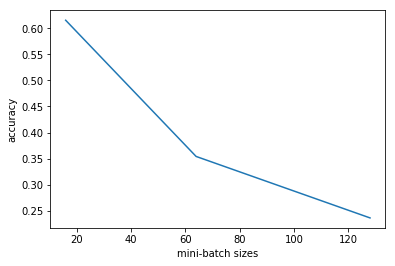

Test Accuracy(hidden nodes+activation+L2-norm+mini-batch): 24.27%


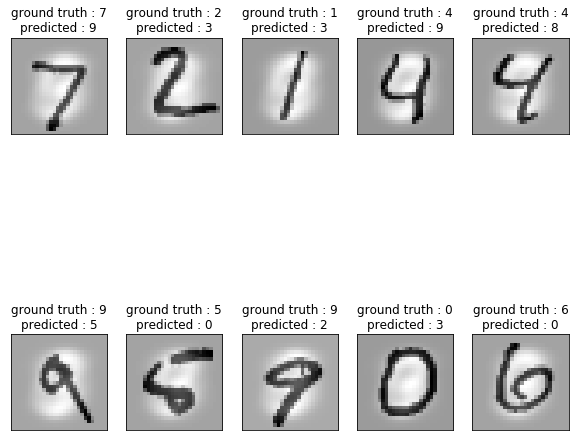

In [24]:
## a few options of mini-batch sizes
plt.plot(batch_sizes, val_accs_3, label='acc per mini-batch sizes')
plt.xlabel('mini-batch sizes')
plt.ylabel('accuracy')
plt.show()

print('Test Accuracy(hidden nodes+activation+L2-norm+mini-batch): %.2f%%' % (100*np.sum(y_test == preds3)/len(y_test)))

misclassified = np.where(preds3 != y_test)[0]
plot_misclassified(X_test_centered, y_test, misclassified, preds3)

* mini-batch는 더 작은 사이즈로 갈수록 좋은 성능을 보임을 확인할 수 있었다.(하지만 시간은 역으로 많이 걸려서 힘들었다.)

* 전반적으로 hidden layer의 node수를 증가 시키고mini-batch를 줄인 상태에서 sigmoid를 activation으로 설정하는게 가장 좋은 성능을 내는 것을 확인할 수 있었다.